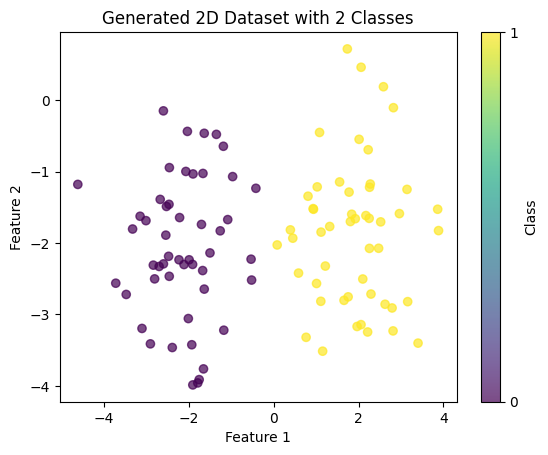

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

class_0 = np.random.randn(50, 2) + np.array([-2, -2])

class_1 = np.random.randn(50, 2) + np.array([2, -2])

X = np.vstack((class_0, class_1))
y = np.hstack((np.zeros(50), np.ones(50)))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("Generated 2D Dataset with 2 Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(ticks=[0, 1], label='Class')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8698 - loss: 0.5845 - val_accuracy: 1.0000 - val_loss: 0.5391
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9819 - loss: 0.5095 - val_accuracy: 1.0000 - val_loss: 0.4831
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9913 - loss: 0.4663 - val_accuracy: 1.0000 - val_loss: 0.4314
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3983 - val_accuracy: 1.0000 - val_loss: 0.3824
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.3488 - val_accuracy: 1.0000 - val_loss: 0.3367
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3173 - val_accuracy: 1.0000 - val_loss: 0.2966
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2601 - val_accuracy: 1.0000 - val_loss: 0.2622
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2489 - val_accuracy: 1.0000 - val_loss: 0.2319

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0018
Test Accuracy: 1.00


226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


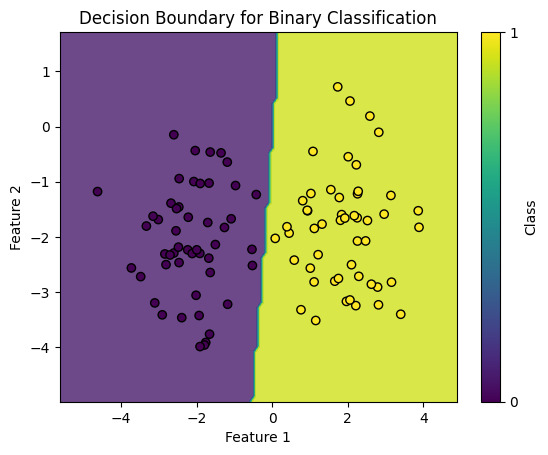

In [8]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')
    plt.title("Decision Boundary for Binary Classification")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(ticks=[0, 1], label='Class')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X, y)


# Question 2


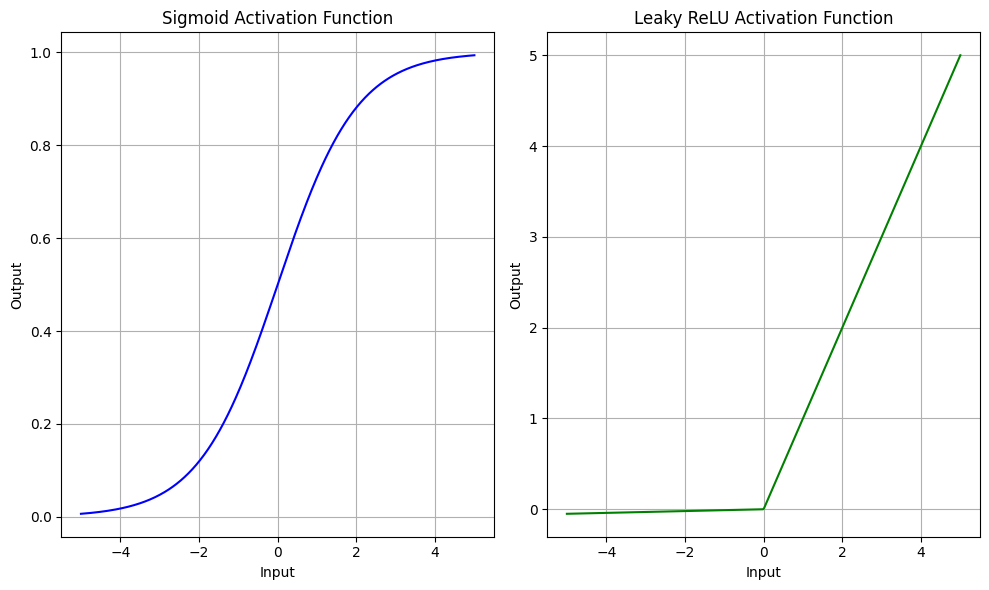

In [10]:
# Sigmoid and Leaky RELU
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

x_values = np.linspace(-5, 5, 400)

sigmoid_values = sigmoid(x_values)
leaky_relu_values = leaky_relu(x_values)

plt.figure(figsize=(10, 6))

# Sigmoid Plot
plt.subplot(1, 2, 1)
plt.plot(x_values, sigmoid_values, label='Sigmoid', color='blue')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

# Leaky ReLU Plot
plt.subplot(1, 2, 2)
plt.plot(x_values, leaky_relu_values, label='Leaky ReLU', color='green')
plt.title('Leaky ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()
